In [ ]:
print("Mamun")

Mamun


In [ ]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [ ]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [ ]:
print("Mamun")

Mamun


In [ ]:
#Open image and display
original=Image.open(requests.get('http://images5.fanpop.com/image/photos/30900000/beautiful-pic-different-beautiful-pictures-30958243-1600-1200.jpg',stream=True).raw)
tempared=Image.open(requests.get('https://onlinejpgtools.com/images/examples-onlinejpgtools/sunflower.jpg',stream=True).raw)

In [ ]:
#The file format of the source file
print("Original image format=",original.format)
print("Original image format=",tempared.format)
#Size of image
print("Size of the image=",original.size)
print("Size of the image=",tempared.size)

Original image format= JPEG
Original image format= JPEG
Size of the image= (1600, 1200)
Size of the image= (600, 400)


In [ ]:
#Resize Image
original=original.resize((250,160))
print("Size=",original.size)
original.save("pan_card_tampering/image/original.png")
tempared=tempared.resize((250,160))
print("Size=",tempared.size)
tempared.save("pan_card_tampering/image/tempared.png")

Size= (250, 160)
Size= (250, 160)


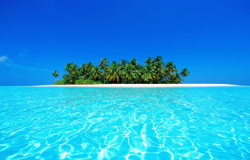

In [ ]:
#See the Original Image
original

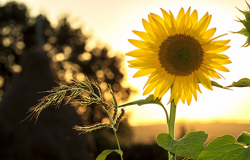

In [ ]:
# See the Tempared Image
tempared

In [ ]:
# Load the Images 
original=cv2.imread("pan_card_tampering/image/original.jpg")
tempared=cv2.imread("pan_card_tampering/image/tempared.jpg")

In [ ]:
# Cgange colors in Gray
original_gray=cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
tempared_gray=cv2.cvtColor(tempared,cv2.COLOR_BGR2GRAY)

In [ ]:
original_gray

array([[ 62,  62,  62, ...,  72,  71,  71],
       [ 62,  62,  63, ...,  72,  71,  71],
       [ 63,  63,  63, ...,  72,  71,  71],
       ...,
       [144, 144, 145, ..., 144, 151, 151],
       [142, 141, 142, ..., 141, 134, 134],
       [135, 136, 138, ..., 134, 137, 137]], dtype=uint8)

In [ ]:
tempared_gray

array([[233, 241, 247, ..., 232, 245, 228],
       [229, 232, 234, ..., 249, 243, 230],
       [222, 224, 226, ..., 219, 244, 247],
       ...,
       [  5,   5,   5, ...,  71,  72,  71],
       [  6,   6,   6, ...,  77,  79,  76],
       [  7,   7,   6, ...,  84,  88,  83]], dtype=uint8)

In [ ]:
# Check the similarity Score
(score,diff)=structural_similarity(original_gray,tempared_gray,full=True)
diff=(diff*255).astype('uint8')
print("SSIM:{}".format(score))

SSIM:0.15639179859291316


In [ ]:
# Calculating theresold and contors
thresh=cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts=cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(cnts)


In [ ]:
# Loop over the contours
for c in cnts:
  (x,y,w,h)=cv2.boundingRect(c)
  cv2.rectangle(original,(x,y),(x+w,y+h),(0,0,255),2)
  cv2.rectangle(tempared,(x,y),(x+w,y+h),(0,0,255),2)

Original Image 


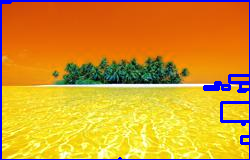

In [ ]:
# Display the original Image
print("Original Image ")
Image.fromarray(original)

Tempared Image


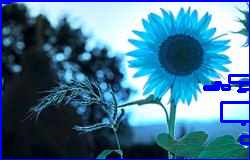

In [ ]:
#Display Tempared Inage
print("Tempared Image")
Image.fromarray(tempared)

Difference Image


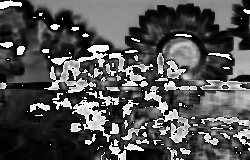

In [ ]:
#Display different Image with Black
print("Difference Image")
Image.fromarray(diff)

Threshold Image


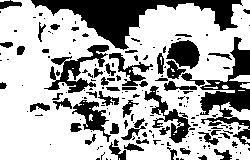

In [ ]:
 # Display Threshold Image with white
 print("Threshold Image")
 Image.fromarray(thresh)